In [101]:
import sklearn
from sklearn.linear_model import LinearRegression
import ccxt
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd

In [102]:
ex = ccxt.binance()

In [103]:
data = ex.fetch_ohlcv("ETHUSDT", "1d", limit=365)
df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index, unit='ms')
df.sort_index(inplace=True, ascending=True)
df = df[["close"]].iloc[-365:]
df

,close
timestamp,
2023-02-04,1666.38
2023-02-05,1629.02
2023-02-06,1614.29
2023-02-07,1671.03
2023-02-08,1650.43
...,...
2024-01-30,2343.01
2024-01-31,2283.14
2024-02-01,2304.28


In [104]:
df['dummy'] = range(1, len(df) + 1)
df['dummy2'] = df['dummy'] ** 2

In [105]:
y = df["close"].values
X = df[["dummy", "dummy2"]].values
# X = df[["dummy"]].values

In [106]:
model = LinearRegression()
model.fit(X.reshape(-1, 2), y)

LinearRegression()

In [107]:
futuresDays = [7, 30, 90]
predictions = model.predict([[len(X) + i, (len(X) + i) ** 2] for i in futuresDays])
predictions

array([2386.72673869, 2507.97213892, 2871.63981699])

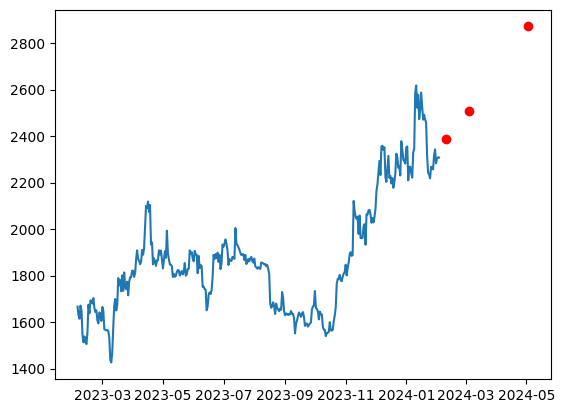

In [108]:
fig, ax = plt.subplots()
ax.plot(df.index, df["close"])
ax.plot([df.index[-1] + pd.Timedelta(days=i) for i in futuresDays], predictions, 'ro')